In [1]:
import h5py
import copy
import lmfit
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from rich.progress import Progress
from scipy.stats import binned_statistic
from utils.plot_utils import set_fontsize
from utils.hdf_utils import load_measurement_data_devices_attrs

In [2]:
hdf_dir = Path("../data")

In [3]:
yag_channel = 0
pmt_channel = 1
pd_channel = 2
pdn_channel = 3
shutter_channel = 4
pdrc_channel = 5

In [107]:
fname = "2021_3_8.hdf"

with h5py.File(hdf_dir / fname, 'r') as f:
    dset_names = list(f.keys())
dset_names

['1615249329 YAG Focal Length Adjustment', '1615251338 Neon Flow Rate']

In [5]:
dset_name = dset_names[0]
devices = ()

In [6]:
slice_flm  = np.s_[100:250]
slice_absm = np.s_[-500:]
slice_fli  = np.s_[100:]
slice_absi = np.s_[10:]

In [9]:
scan_parameter = "PXIe5171 DummyFunc"

In [97]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
shutter_data = np.array([pxie[idx][:,shutter_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdrc_data = np.array([pxie[idx][:,pdrc_channel].astype(float) for idx in range(1,len(pxie)+1)])

scan_parameters = np.array([float(pxie_attrs[idx][scan_parameter]) for idx in range(1,len(pxie)+1)])

norm_data = -pd_data/pdn_data

C:\Users\CeNTREX\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


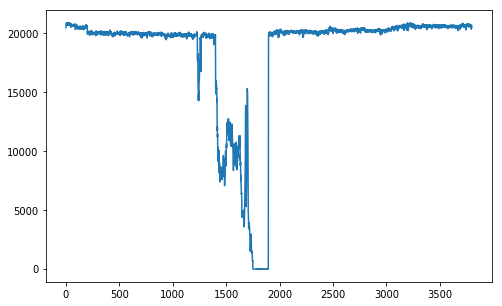

In [98]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.nanmin(pdn_data, axis = 1))

In [99]:
norm_data_norm = norm_data.copy()

mask_yag = yag_data.max(axis = 1) < 500
mask_pdn = pdn_data.min(axis = 1) < 19000
mask = mask_yag | mask_pdn

norm_data_norm[mask] = np.nan
norm_data_norm -= norm_data_norm[:,slice_absm].mean(axis = 1)[:, np.newaxis]

absorption_integral = np.trapz(norm_data_norm[:, slice_absi])

In [101]:
bin_width = np.diff(np.unique(scan_parameters)).min()
bins = np.arange(np.unique(scan_parameters).min()-bin_width/2, np.unique(scan_parameters).max()+bin_width, bin_width)
stat, bin_edges, bin_number = binned_statistic(scan_parameters, absorption_integral, lambda x: np.nanmean(x), bins = bins) 
err, bin_edges, bin_number = binned_statistic(scan_parameters, absorption_integral, lambda x: np.nanstd(x)/(np.sqrt(len(x))-1), bins = bins) 

bin_means = bin_edges[:-1]+bin_width/2

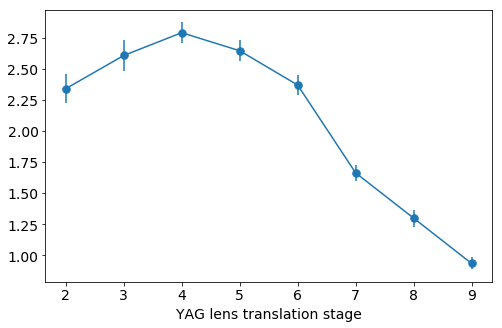

In [104]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(bin_means, stat, yerr = err, fmt = '.', ms = 15, linestyle = '-')

ax.set_xlabel('YAG lens translation stage')

set_fontsize(ax, 14)

# Neon Flow Rate

In [108]:
dset_name = dset_names[1]
devices = ()

In [109]:
slice_flm  = np.s_[100:250]
slice_absm = np.s_[-500:]
slice_fli  = np.s_[100:]
slice_absi = np.s_[10:]

In [110]:
scan_parameter = "PXIe5171 DummyFunc"

In [198]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(hdf_dir / fname, dset_name, devices)

yag_data = np.array([pxie[idx][:,yag_channel] for idx in range(1,len(pxie)+1)])
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pd_data = np.array([pxie[idx][:,pd_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdn_data = np.array([pxie[idx][:,pdn_channel].astype(float) for idx in range(1,len(pxie)+1)])
shutter_data = np.array([pxie[idx][:,shutter_channel].astype(float) for idx in range(1,len(pxie)+1)])
pdrc_data = np.array([pxie[idx][:,pdrc_channel].astype(float) for idx in range(1,len(pxie)+1)])

scan_parameters = np.array([float(pxie_attrs[idx][scan_parameter]) for idx in range(1,len(pxie)+1)])

norm_data = -pd_data/pdn_data

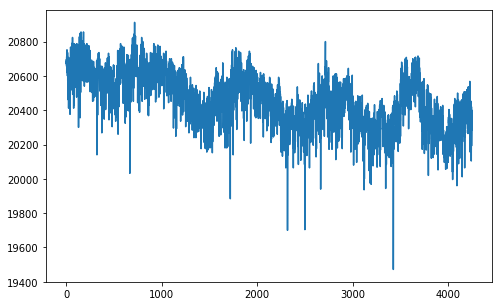

In [199]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.nanmin(pdn_data, axis = 1))

In [200]:
norm_data_norm = norm_data.copy()

mask_yag = yag_data.max(axis = 1) < 500
mask_pdn = pdn_data.min(axis = 1) < 19000
mask = mask_yag | mask_pdn

norm_data_norm[mask] = np.nan
norm_data_norm -= norm_data_norm[:,slice_absm].mean(axis = 1)[:, np.newaxis]

absorption_integral = np.trapz(norm_data_norm[:, slice_absi])

In [201]:
bin_width = np.diff(np.unique(scan_parameters)).min()
bins = np.arange(np.unique(scan_parameters).min()-bin_width/2, np.unique(scan_parameters).max()+bin_width, bin_width)
stat, bin_edges, bin_number = binned_statistic(scan_parameters, absorption_integral, lambda x: np.nanmean(x), bins = bins) 
err, bin_edges, bin_number = binned_statistic(scan_parameters, absorption_integral, lambda x: np.nanstd(x)/(np.sqrt(len(x))-1), bins = bins) 

bin_means = bin_edges[:-1]+bin_width/2

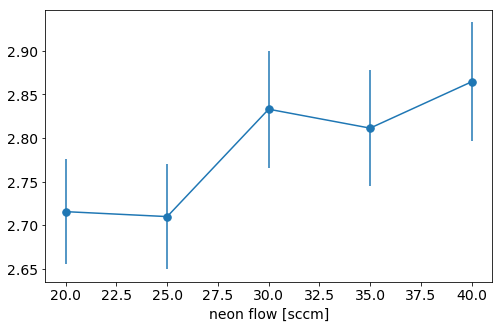

In [202]:
fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(bin_means, stat, yerr = err, fmt = '.', ms = 15, linestyle = '-')

ax.set_xlabel('neon flow [sccm]')


set_fontsize(ax, 14)

(-2, 8)

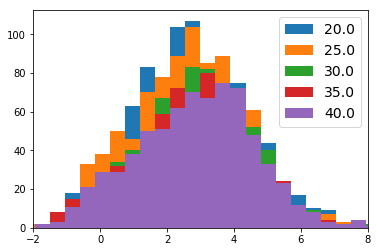

In [203]:
b = np.linspace(np.nanmin(absorption_integral), np.nanmax(absorption_integral), 35)
for i in np.unique(bin_number):
    plt.hist(absorption_integral[bin_number == i], bins = b, label = f"{bin_means[i-1]}");
plt.legend(fontsize = 14)
plt.xlim(-2,8)